In [2]:
cd Documents/University/Test

/Users/audreyli/Documents/University/Test


In [3]:
import pandas as pd
import numpy as np

# Opens the file and turns it into a data structure which is easier to manipulate

dataset= pd.read_csv('WORK january_2020.txt', delimiter= "\t", header=None)
dataset.columns= ["Tweet ID", "Date", "Time", "Language", "NULL"]

In [4]:
# Counts the number of times a given value (the date) occurs in the data structure
# and sorts the results by date

instances= dataset['Date'].value_counts().sort_index()
print(instances)

2020-01-04         1
2020-01-06         2
2020-01-08         4
2020-01-09        11
2020-01-10         4
2020-01-11         9
2020-01-12         3
2020-01-13         3
2020-01-17        19
2020-01-18         9
2020-01-19         3
2020-01-20        70
2020-01-21        95
2020-01-22       385
2020-01-23       597
2020-01-24       906
2020-01-25       993
2020-01-26      1198
2020-01-27     48438
2020-01-28    147302
2020-01-29    151240
2020-01-30    181564
2020-01-31    186307
Name: Date, dtype: int64


In [5]:
# Because the data does not include dates where there were no tweets,
# the following code appends those dates onto 'instances' in order 
# to provide a more accurate x axis later in the data visualization

no_tweets= pd.Series([0, 0, 0, 0, 0, 0, 0, 0], index=["2020-01-01", "2020-01-02", "2020-01-03", "2020-01-05", "2020-01-07", "2020-01-14", "2020-01-15", "2020-01-16"])
full_instances= instances.append(no_tweets)
series= full_instances.sort_index()
series.index.name= 'Date'
series.reset_index()
print(series)

Date
2020-01-01         0
2020-01-02         0
2020-01-03         0
2020-01-04         1
2020-01-05         0
2020-01-06         2
2020-01-07         0
2020-01-08         4
2020-01-09        11
2020-01-10         4
2020-01-11         9
2020-01-12         3
2020-01-13         3
2020-01-14         0
2020-01-15         0
2020-01-16         0
2020-01-17        19
2020-01-18         9
2020-01-19         3
2020-01-20        70
2020-01-21        95
2020-01-22       385
2020-01-23       597
2020-01-24       906
2020-01-25       993
2020-01-26      1198
2020-01-27     48438
2020-01-28    147302
2020-01-29    151240
2020-01-30    181564
2020-01-31    186307
dtype: int64


In [6]:
# Creating the dataframe which the data visualization will be based upon

full_data= pd.DataFrame([['2020-01-01', 0], ['2020-01-02', 0], ['2020-01-03', 0],
                            ['2020-01-04', 1], ['2020-01-05', 0], ['2020-01-06', 2],
                            ['2020-01-07', 0], ['2020-01-08', 4], ['2020-01-09', 11],
                            ['2020-01-10', 4], ['2020-01-11', 9], ['2020-01-12', 3],
                            ['2020-01-13', 3], ['2020-01-14', 0], ['2020-01-15', 0],
                            ['2020-01-16', 0], ['2020-01-17', 19], ['2020-01-18', 9],
                            ['2020-01-19', 3], ['2020-01-20', 70], ['2020-01-21', 95],
                            ['2020-01-22', 385], ['2020-01-23', 597], ['2020-01-24', 906],
                            ['2020-01-25', 993], ['2020-01-26', 1198], ['2020-01-27', 48438],
                            ['2020-01-28', 147302], ['2020-01-29', 151240], ['2020-01-30', 181564],
                            ['2020-01-31', 186307]],
                          columns=["Date", "Number of Tweets"])

display(full_data)

,Date,Number of Tweets
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,1
4,2020-01-05,0
5,2020-01-06,2
6,2020-01-07,0
7,2020-01-08,4
8,2020-01-09,11
9,2020-01-10,4


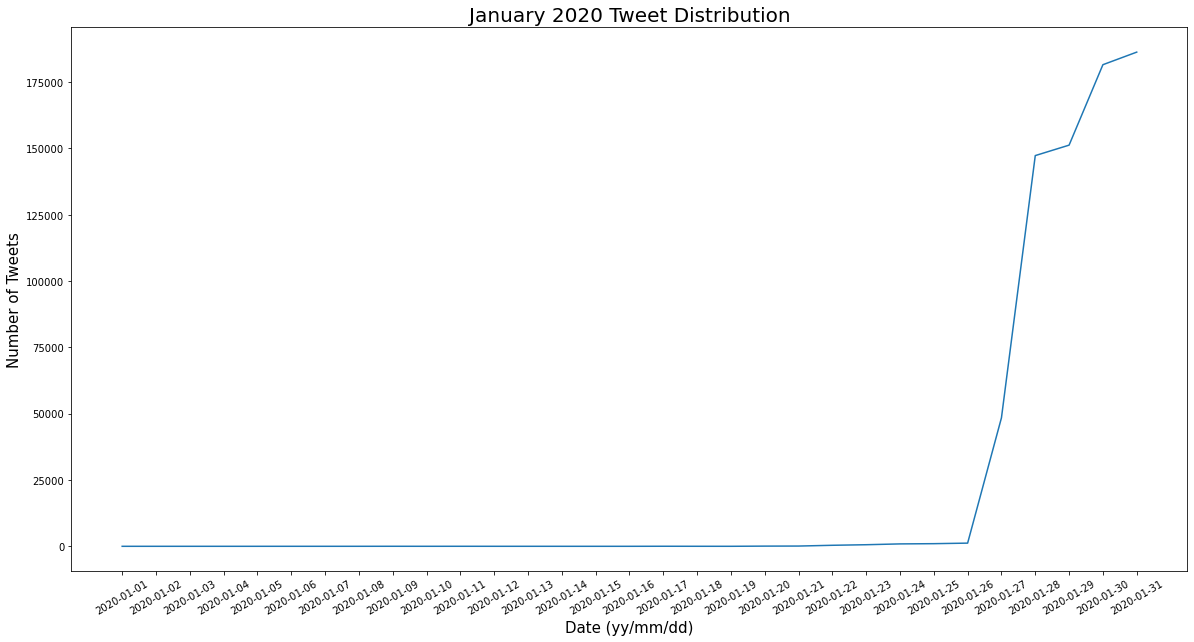

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the overall data as a line plot

plt.figure(figsize=(20,10))
monthly_distribution= sns.lineplot(x="Date", y="Number of Tweets", data=full_data)
plt.xticks(rotation=30)
plt.xlabel("Date (yy/mm/dd)", size=15)
plt.ylabel("Number of Tweets", size=15)
plt.title("January 2020 Tweet Distribution", size=20)
plt.show()

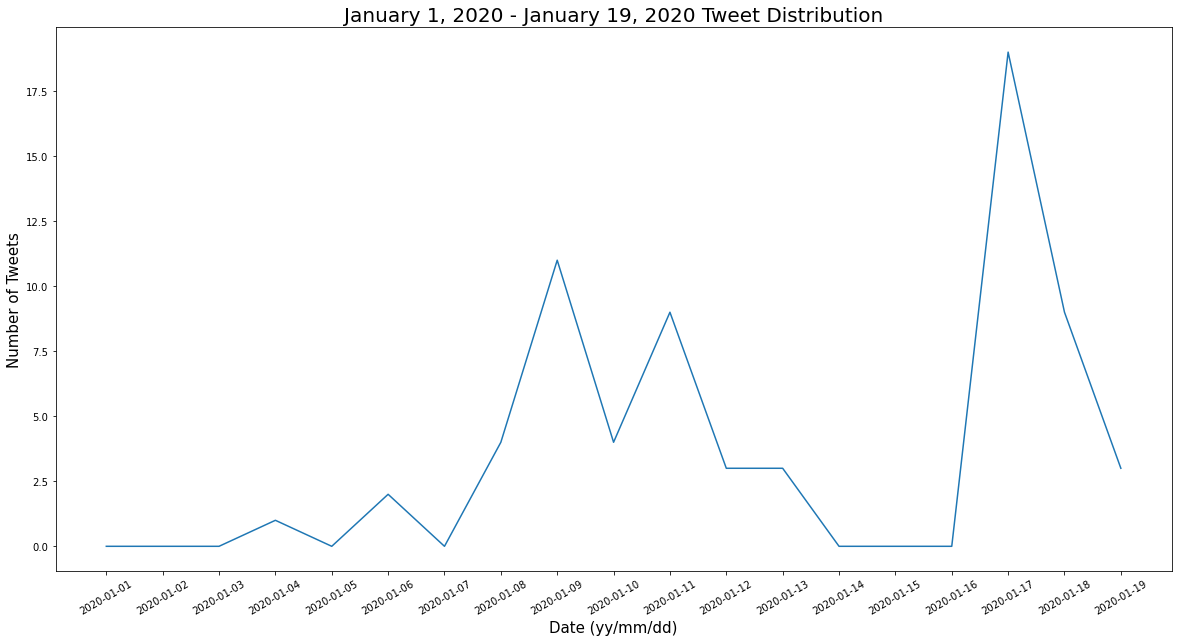

In [8]:
# Visualizing the first 19 days of distribution as a line plot.
# Because the scale of the y axis for the overall data is so large,
# it becomes difficult to visualize smaller fluctations.  The date
# range for this plot was chosen based on the range of the y axis
# (the number of tweets) and the ability to visualize fluctuations
# which would be invisible within a larger range.

plt.figure(figsize=(20,10))
section_1= sns.lineplot(x="Date", y="Number of Tweets", data=full_data[:19])
plt.xlabel("Date (yy/mm/dd)", size=15)
plt.ylabel("Number of Tweets", size=15)
plt.title("January 1, 2020 - January 19, 2020 Tweet Distribution", size=20)
plt.xticks(rotation=30)
plt.show()

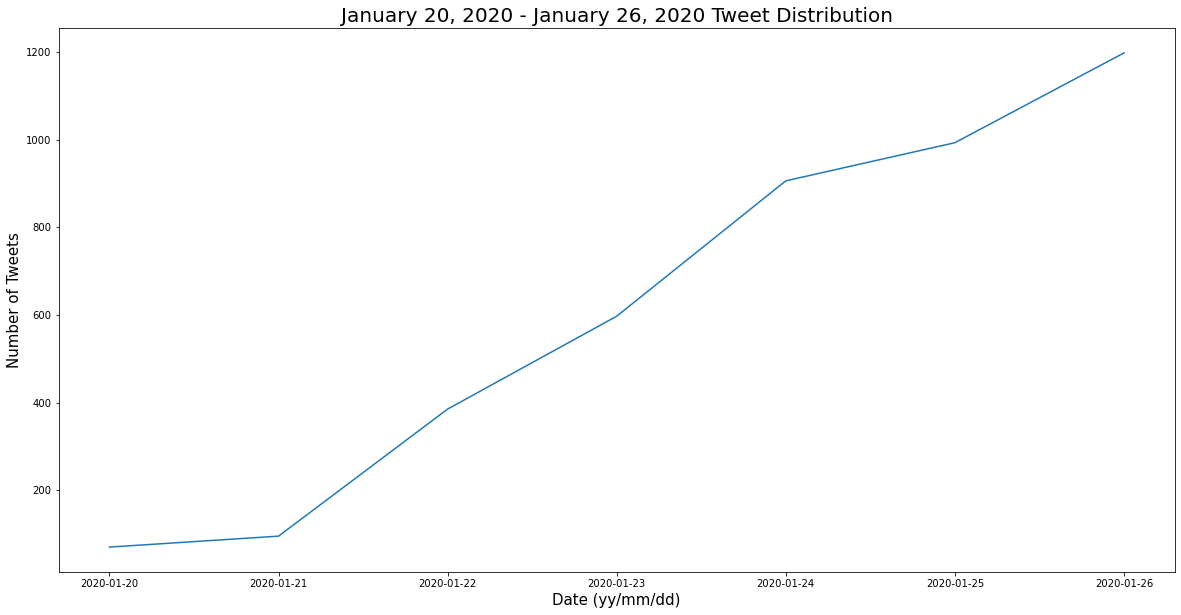

In [14]:
# Visualizing the data from January 20-26 as a line plot.
# Because the scale of the y axis for the overall data is so large,
# it becomes difficult to visualize smaller fluctations.  The date
# range for this plot was chosen based on the range of the y axis
# (the number of tweets) and the ability to visualize fluctuations
# which would be invisible within a larger range.

plt.figure(figsize=(20,10))
section_2= sns.lineplot(x="Date", y="Number of Tweets", data=full_data[19:26])
plt.xlabel("Date (yy/mm/dd)", size=15)
plt.ylabel("Number of Tweets", size=15)
plt.title("January 20, 2020 - January 26, 2020 Tweet Distribution", size=20)
plt.show()

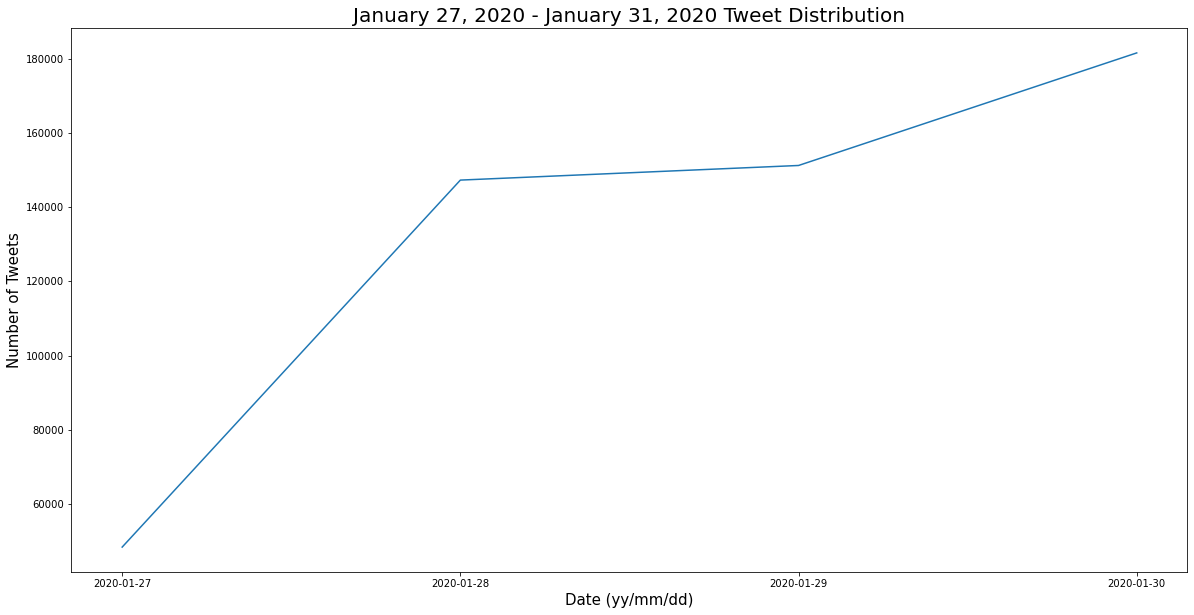

In [12]:
# Visualizing the data from January 27-31 as a line plot.
# The date range for this plot was chosen based on the range of 
# the y axis (the number of tweets) and the ability to visualize 
# fluctuations.

plt.figure(figsize=(20,10))
section_3= sns.lineplot(x="Date", y="Number of Tweets", data=full_data[26:30])
plt.xlabel("Date (yy/mm/dd)", size=15)
plt.ylabel("Number of Tweets", size=15)
plt.title("January 27, 2020 - January 31, 2020 Tweet Distribution", size=20)
plt.show()